In [2]:
#Imports
import gspread
import json
import oauth2client
from oauth2client.service_account import ServiceAccountCredentials
import numpy
import pandas

In [154]:
#Access GSheet "Fluxo de Caixa"
scope = ["https://spreadsheets.google.com/feeds"]

credentials = ServiceAccountCredentials.from_json_keyfile_name("C:/Users/Cleverton/Google Drive/CleverSports/Clever Sports-db6d4aab1f00.json",scope)

client = gspread.authorize(credentials)

spreadsheet = client.open("Fluxo_de_Caixa_Livre_CleverSports")

worksheet = spreadsheet.worksheet("Resumo")

data = worksheet.get_all_values()


In [174]:
panda_data = pandas.DataFrame(data)

In [156]:
#Create a Variable with TRUE if the product is the target
fr920xt = panda_data[1] == "010-01174-20"
#select all rows with the target product
new_data = panda_data[fr920xt]
new_data

,0,1,2,3,4,5,6,7,8,9,10,11
1,01/09/2015,010-01174-20,Forerunner 920XT Blu/Blk NA + HRM,"1,00","1.682,50",,,,1,,2015-36,"1,00"
2,01/11/2015,010-01174-20,Forerunner 920XT Blu/Blk NA + HRM,"10,00","1.651,20",,,,11,0,2015-45,"11,00"
3,21/11/2015,010-01174-20,Forerunner 920XT Blu/Blk NA + HRM,,,1,"1.897,40","1.682,50",10,1,2015-47,"10,00"
4,28/11/2015,010-01174-20,Forerunner 920XT Blu/Blk NA + HRM,,,1,"2.059,00","1.651,20",9,2,2015-48,"9,00"
5,05/12/2015,010-01174-20,Forerunner 920XT Blu/Blk NA + HRM,,,3,"2.059,00","1.651,20",6,5,2015-49,"6,00"
6,12/12/2015,010-01174-20,Forerunner 920XT Blu/Blk NA + HRM,,,3,"6.177,00","1.651,20",3,8,2015-50,"3,00"
7,19/12/2015,010-01174-20,Forerunner 920XT Blu/Blk NA + HRM,,,3,"2.059,00","1.651,20",0,11,2015-51,"0,00"
8,01/02/2016,010-01174-20,FORERUNNER 920XT BLACK/BLUE WITH HRM-RUN,"6,00","1.851,27",,,,6,11,2016-06,"6,00"
9,05/03/2016,010-01174-20,FORERUNNER 920XT BLACK/BLUE WITH HRM-RUN,,,4,"2.174,25","1.851,27",2,15,2016-10,"2,00"
10,12/03/2016,010-01174-20,FORERUNNER 920XT BLACK/BLUE WITH HRM-RUN,,,1,"2.299,00","1.851,27",1,16,2016-11,"1,00"


In [171]:
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta
import numpy as np
import matplotlib.dates as md
%matplotlib notebook
#%matplotlib inline
matplotlib.style.use('ggplot')
y = pandas.to_numeric(new_data[8])
x = [dt.strptime(i,"%d/%m/%Y") for i in new_data[0]]
y2 = pandas.to_numeric(new_data[5])

<IPython.core.display.Javascript object>


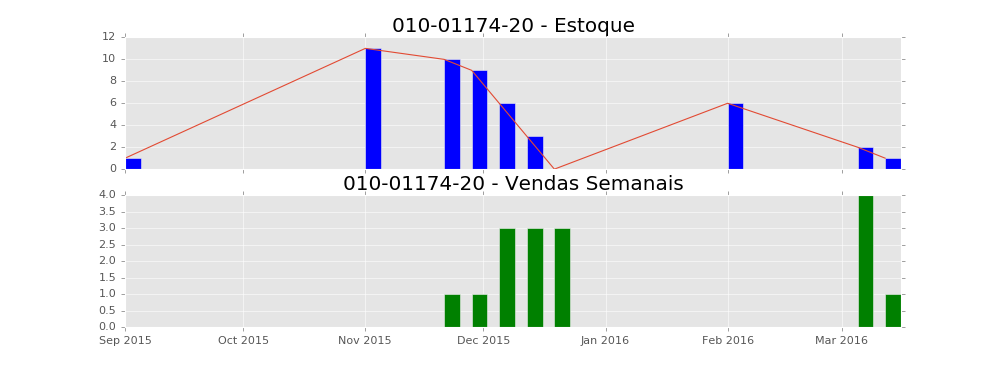

<Container object of 10 artists>

In [173]:

f, axarr = plt.subplots (2, sharex=True)
axarr[0].plot(x,y)
axarr[0].set_title('{} - Estoque'.format(str(new_data[1][1])), fontsize=18)
#plt.xlabel('Semana',fontsize=18)
axarr[0].bar(x,y,4,color="blue")

axarr[1].set_title('{} - Vendas Semanais'.format(str(new_data[1][1])), fontsize=18)
axarr[1].bar(x,y2,4,color="green")


#y2 = pandas.to_numeric(new_data[5])
#plot2 = plt.bar(x,y,4,color="blue")
#plot2.show()
#plt.show()

<Container object of 10 artists>